T dim 18
x_dim 17


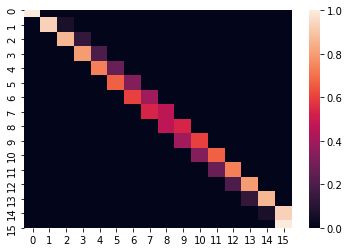

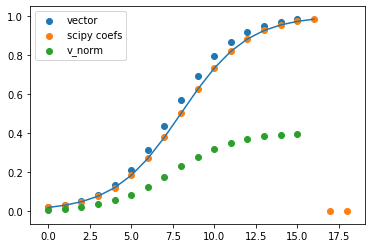

Condition number
 12730.232708648695
norm(yk) 2.485214974779029


In [1]:
from vqls import *
from utils import *
lower = 0.
upper = 1. 
n_step = 16
f_i = 0.0  
MAX_ITER = 100

nq=4
# K = 2^n = dim(T)-2
# with dim(S) = KxK
# n = num qubits
# T = set of knots

scaled=False

label = 'sigmoid'
func = sigmoid_t


x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]

if scaled:
  norm = np.linalg.norm(y)
  y = y / norm
tck=splrep(x,y,k=1) #coeffs
#plt.scatter(range(len(tck[1])),tck[0], label = "scipy knots")


#############################################################################################
###################################### System Preparation ###################################
#############################################################################################

matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled);

import seaborn as sns

sns.heatmap(matrix)
plt.show()
plt.plot(y)

plt.scatter(range(len(vector)), vector, label="vector")
plt.scatter(range(len(tck[1])),tck[1], label="scipy coefs")
plt.scatter(range(len(v_norm)), v_norm, label="v_norm")
plt.legend()
plt.show()
#############################################################################################
################################# VQLS and Linear Prob. Solving #############################
#############################################################################################

k_numb=np.linalg.cond(np.array(matrix))
print('Condition number\n',k_numb)
print('norm(yk)',np.linalg.norm(vector))




In [2]:
vqls_circuit = VQLS(matrix,v_norm,nq,opt='COBYLA') 


(<Figure size 936x360 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7f592573dd10>)


tensor([-0.01947198+0.j, -0.01522519+0.j, -0.02271326+0.j,
        -0.0256207 +0.j, -0.07189905+0.j, -0.10903766+0.j,
        -0.11469609+0.j, -0.11347549+0.j, -0.25668907+0.j,
        -0.29197073+0.j, -0.31148153+0.j, -0.33033558+0.j,
        -0.34969566+0.j, -0.36780721+0.j, -0.3869223 +0.j,
        -0.43654275+0.j], requires_grad=True)

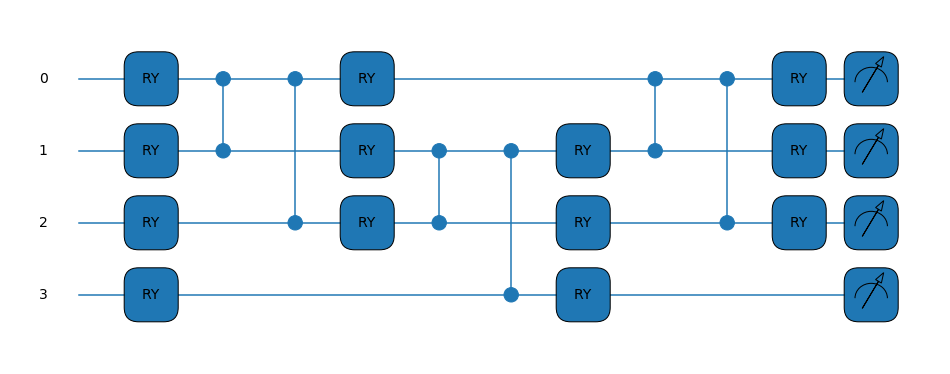

In [3]:
weights = np.load("weights_16_100.npy")
q = vqls_circuit.solution(weights, True)
q

In [4]:
weights

tensor([3.1912408 , 1.60902818, 3.22201364, 1.57831723, 1.89145278,
        1.29144839, 3.43994843, 0.67964376, 1.36558753, 2.51840039,
        1.20486104, 1.68571271, 0.37182304], requires_grad=True)

[tensor([3.1912408 , 1.60902818, 3.22201364, 1.57831723, 1.89145278,
        1.29144839, 3.43994843, 0.67964376, 1.36558753, 2.51840039,
        1.20486104, 1.68571271, 0.37182304], requires_grad=True), 0, 0, 0, 'Re']

(<Figure size 1152x432 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7f5925f8f990>)


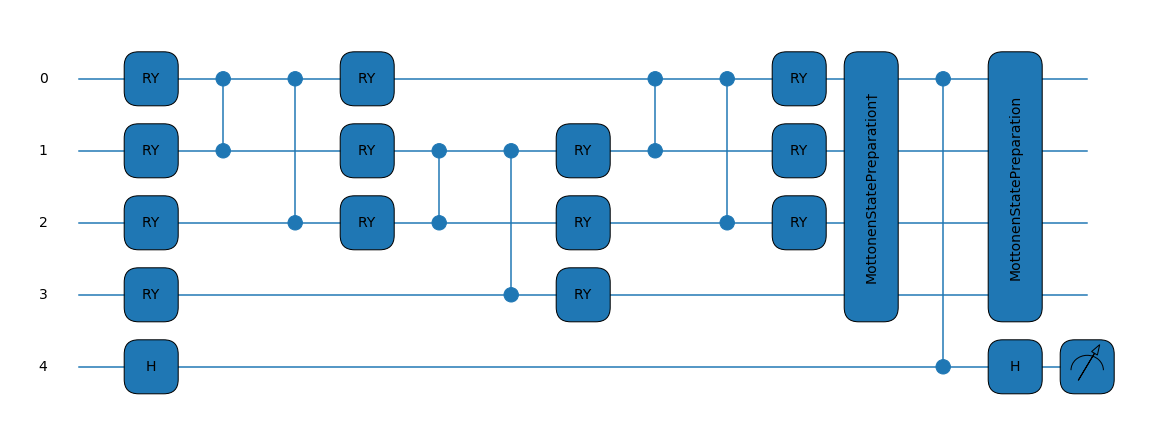

In [5]:
re_params=[weights, None, None, None, "Re"]
try:
    vqls_circuit.cost_execution(weights)
except:
    pass

In [6]:
c = np.linalg.solve(matrix,vector)
print('beta_classic                 :',c)
print('beta  qunatum')
y_c=np.dot(matrix,c) #classic


y_q=np.dot(matrix,q) #hybrid
                     #Quantum
y_fq=[]
for el in matrix:
  y_fq.append(vqls_circuit.direct_prod2(weights,el))
rss_full = np.sum(np.square(np.array(y_c) - np.array(y_fq)))
rss_hybr = np.sum(np.square(np.array(y_c) - np.array(y_q)))

print('RSS_q:',rss_full)
print('RSS_h:',rss_hybr)



beta_classic                 : [ 1.79862100e-02  4.02018812e-02 -1.08690957e-01  1.08546744e+00
 -3.92600627e+00  1.12987468e+01 -2.19716681e+01  3.37325659e+01
 -3.76220919e+01  3.39810949e+01 -2.15041058e+01  1.19391401e+01
 -3.16049806e+00  1.93615865e+00  7.97671560e-01  9.82013790e-01]
beta  qunatum
[-0.01947198+0.j -0.01522519+0.j -0.02271326+0.j -0.0256207 +0.j
 -0.07189905+0.j -0.10903766+0.j -0.11469609+0.j -0.11347549+0.j
 -0.25668907+0.j -0.29197073+0.j -0.31148153+0.j -0.33033558+0.j
 -0.34969566+0.j -0.36780721+0.j -0.3869223 +0.j -0.43654275+0.j]
[-0.01680475+0.j  0.01759709+0.j -0.02157078+0.j -0.02694291+0.j
 -0.07189905+0.j -0.10903766+0.j -0.11469609+0.j -0.11347549+0.j
 -0.25668907+0.j -0.29197073+0.j -0.31148153+0.j -0.33033558+0.j
 -0.34969566+0.j -0.36780721+0.j -0.3869223 +0.j -0.43654275+0.j]
[-0.02634495+0.j -0.02186906+0.j  0.01947198+0.j  0.01522519+0.j
 -0.07189905+0.j -0.10903766+0.j -0.11469609+0.j -0.11347549+0.j
 -0.25668907+0.j -0.29197073+0.j -0.311481

In [11]:
q.real

tensor([-0.01947198, -0.01522519, -0.02271326, -0.0256207 , -0.07189905,
        -0.10903766, -0.11469609, -0.11347549, -0.25668907, -0.29197073,
        -0.31148153, -0.33033558, -0.34969566, -0.36780721, -0.3869223 ,
        -0.43654275], requires_grad=True)

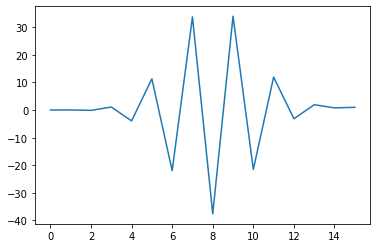

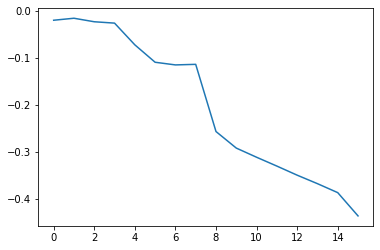

In [13]:
plt.plot(c)
plt.show()
plt.plot(q.real)

/home/fi_ippo/anaconda3/envs/tesi/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


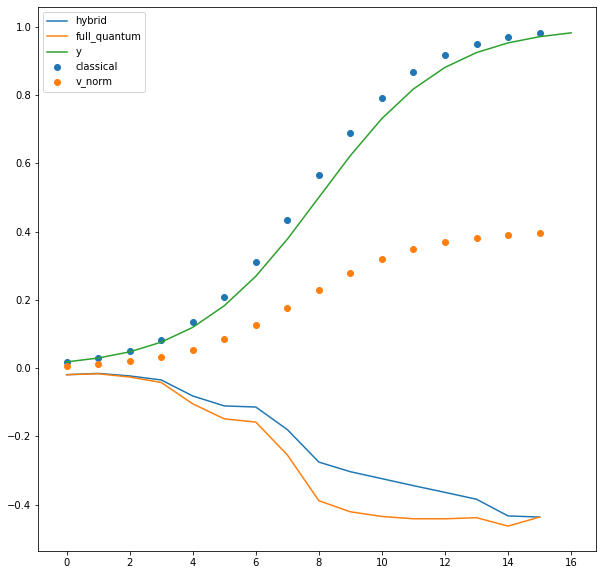

In [7]:
plt.figure(figsize=(10,10))
plt.plot(range(len(y_fq)),(y_q),label= "hybrid")
plt.plot(range(len(y_fq)),(y_fq), label="full_quantum")
plt.scatter(range(len(y_fq)),y_c, label="classical")
plt.scatter(range(len(v_norm)), v_norm, label="v_norm")

plt.plot(y, label="y")
plt.legend()